## Preliminary Simulation Results

In this file, we  

- calculate the optimal consumption fuction using the endogenous grid method of `Carroll (2006)`, and

- create plots for the optimal consumption function, MPCs and relative errors.

In [1]:
run optimality

In [2]:
grid_med, grid_max = 10, 1e6  # median and maximum grid points
tol = 1e-5                    # tolerance level to terminate time iteration

In [3]:
cp = ConsumerProblem(grid_med=grid_med, grid_max=grid_max)  # create an event
ampc = c_bar(cp)                                            # calculating the AMPC

In [4]:
ampc

array([0.00340493, 0.00329918])

#### Calculating the optimal consumption function

In [5]:
a_init, c_init = init_cand(cp, ampc, α=0)  # initial guess
a_star, c_star, k = solve_model_time_iter(cp, T, a_init, c_init, tol=tol)

Error at iteration 500 is 0.00019283910097489532. 
Error at iteration 1000 is 2.728648230165831e-05. 

Converged in 1270 iterations.


#### Optimal consumption function

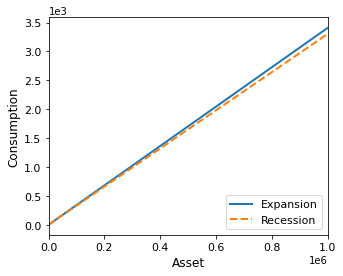

In [6]:
fig, ax = plt.subplots(figsize=(5,4))

lab = ['Expansion', 'Recession']
ls = ['-', '--']
for i in range(len(cp.P)):
    ax.plot(a_star[:,i], c_star[:,i], label=lab[i], ls=ls[i], lw=2)

ax.set_xlim(0, 1e6)
ax.set_xlabel('Asset', fontsize=12)
ax.set_ylabel('Consumption', fontsize=12)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend(loc='lower right', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
#plt.savefig('fig_cf_large.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

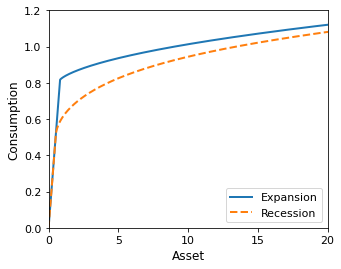

In [7]:
fig, ax = plt.subplots(figsize=(5,4))

lab = ['Expansion', 'Recession']
ls = ['-', '--']
for i in range(len(cp.P)):
    ax.plot(a_star[:,i], c_star[:,i], label=lab[i], ls=ls[i], lw=2)

ax.set_xlim(0, 20)
ax.set_ylim(0, 1.2)
ax.set_xlabel('Asset', fontsize=12)
ax.set_ylabel('Consumption', fontsize=12)
ax.legend(loc='lower right', fontsize=11)
ax.set_xticks([0, 5, 10, 15, 20])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
#plt.savefig('fig_cf_small.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

#### MPCs and relative errors

In [8]:
mpc, err, ampc = cal_mpc(cp, a_star, c_star)

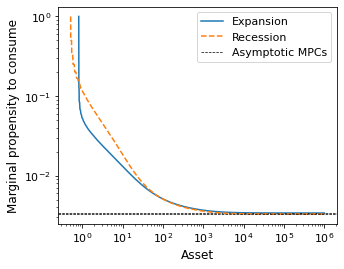

In [9]:
lab_ampc = ['', 'Asymptotic MPCs']
fig, ax = plt.subplots(figsize=(5,4))
for i in range(len(cp.P)):
    ax.plot(a_star[1:,i], mpc[:,i], label=lab[i], ls=ls[i])
    ax.axhline(y=ampc[i], color='black', ls='--', lw=.7, label=lab_ampc[i])
    
ax.set_xlabel('Asset', fontsize=12)
ax.set_ylabel('Marginal propensity to consume',fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.legend(fontsize=11)
#plt.savefig('fig_MPC.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

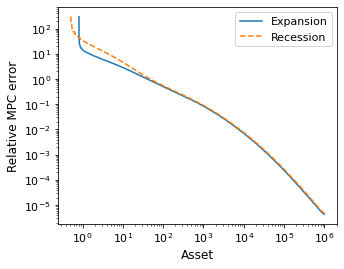

In [10]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(len(cp.P)):
    ax.plot(a_star[1:,i], err[:,i], label=lab[i], ls=ls[i])
    
ax.set_xlabel('Asset',fontsize=12)
ax.set_ylabel('Relative MPC error', fontsize=12)
plt.xscale('log')
plt.yscale('log')
ax.tick_params(labelsize=11)
ax.legend(fontsize=11)
#plt.savefig('fig_MPC_error.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()